In [367]:
"""
Name: Ali Hashmi
    Student ID: 170797990
Name: Bilal Khan 
    Student ID: 200932410
"""
import pandas as pd #Import pandas 
import numpy as np #Import numpy 
import matplotlib.pyplot as plt #Import Matplotlib
from sklearn.linear_model import LogisticRegression #Import LogisticRegression Function To Test With My Own 
from sklearn.metrics import classification_report #Classification Report Module 
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Model
from sklearn.neighbors import KNeighborsClassifier #Import KNN Model

In [368]:
heartDataFrame = pd.read_csv('heart.csv') #CSV to DataFrame
heartDataFrame.head() #View A Sample Of The Table 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [369]:
heartDiseaseFrame = heartDataFrame.HeartDisease.value_counts() #Count The 0s And 1s In The Heart Disease Column, Store In Own Dataframe
totalWithHeartDisease = heartDiseaseFrame[1] #All Positive Cases Go In This Data Frame
totalWithoutHeartDisease = heartDiseaseFrame[0] #All Negative Cases Go In This Data Frame
hdCount = totalWithHeartDisease #Count of all people with heart disease
hdNCount = totalWithoutHeartDisease #Count of all people without heart disease
totalCount = hdCount + hdNCount #Total count of all people 
print("Percentage of Patients That Have Heart Disease: {:.2f}%".format((hdCount / totalCount)*100)) #Percentage of people with heart disease
print("Percentage of Patients That Do Not Heart Disease: {:.2f}%".format((hdNCount / totalCount)*100)) #Percentage of people without heart disease

Percentage of Patients That Have Heart Disease: 55.34%
Percentage of Patients That Do Not Heart Disease: 44.66%


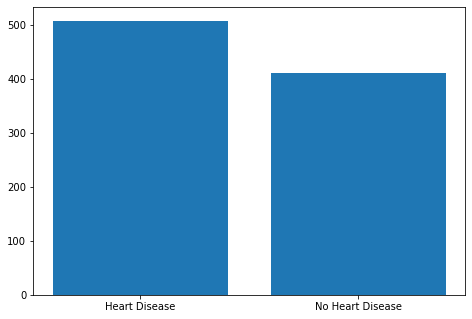

In [370]:
#Create A Graph Of Positive vs Negative Cases
fig = plt.figure()
barGraph = fig.add_axes([0,0,1,1])
Labels = ["Heart Disease", "No Heart Disease"]
heartDiseaseStatus = heartDiseaseFrame
barGraph.bar(Labels, heartDiseaseStatus)
plt.show()

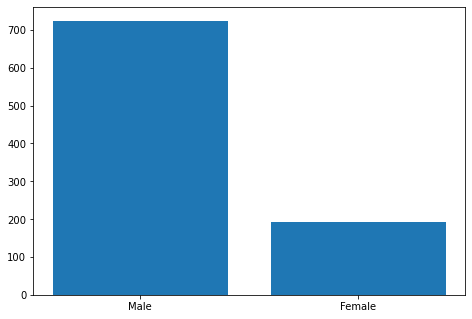

Percentage of Female Patients: 21.02%
Percentage of Male Patients: 78.98%


In [371]:
femalePatientDataframe = heartDataFrame[heartDataFrame["Sex"] == "F"] #Female only dataframe
malePatientDataframe = heartDataFrame[heartDataFrame["Sex"] == "M"] #Male only dataframe
sexDataFrame = heartDataFrame.Sex.value_counts() #Count dataframe to make it easier to plot 
#Plot the bar graph of male patients vs female patients 
fig = plt.figure() 
barGraph = fig.add_axes([0,0,1,1])
Labels = ["Male", "Female"]
barGraph.bar(Labels, sexDataFrame)
plt.show()
totalFemale = len(femalePatientDataframe) #Count Of Female Patients 
totalMale = len(malePatientDataframe) #Count Of Male Patients 
print("Percentage of Female Patients: {:.2f}%".format((totalFemale / totalCount)*100)) #Percentage of female patients
print("Percentage of Male Patients: {:.2f}%".format((totalMale / totalCount)*100)) #Percentage of male patients

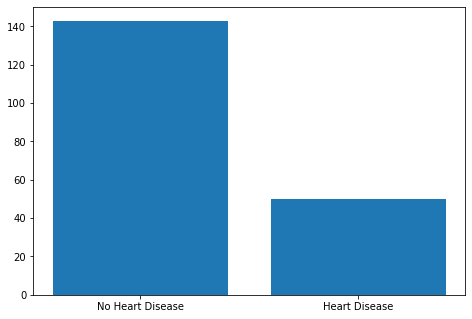

In [372]:
femaleFrame = femalePatientDataframe.HeartDisease.value_counts() #Count dataframe to make it easier to plot 
#Plot the bar graph of female patients with heart disease vs female patients without heart disease 
fig = plt.figure() 
barGraph = fig.add_axes([0,0,1,1])
Labels = ["No Heart Disease", "Heart Disease"]
barGraph.bar(Labels, femaleFrame)
plt.show()

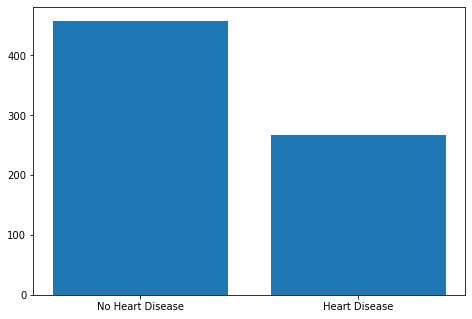

In [373]:
maleFrame = malePatientDataframe.HeartDisease.value_counts() #Count dataframe to make it easier to plot 
#Plot the bar graph of male patients with heart disease vs male patients without heart diseaese
fig = plt.figure() 
barGraph = fig.add_axes([0,0,1,1])
Labels = ["No Heart Disease", "Heart Disease"]
barGraph.bar(Labels, maleFrame)
plt.show()

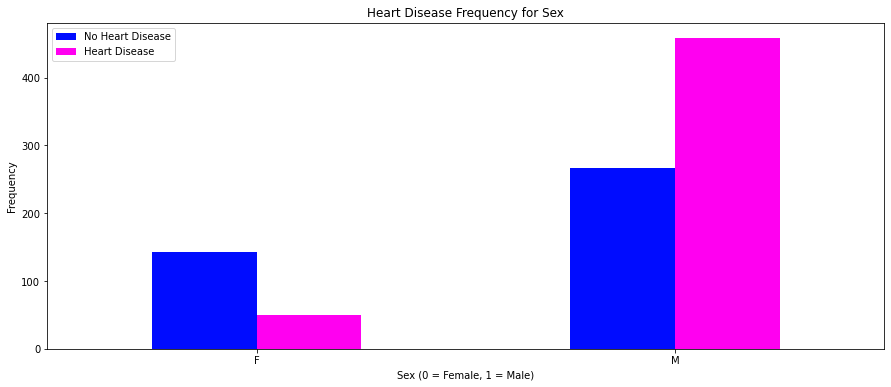

In [374]:
pd.crosstab(heartDataFrame.Sex,heartDataFrame.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#000CFF','#FF00F0' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

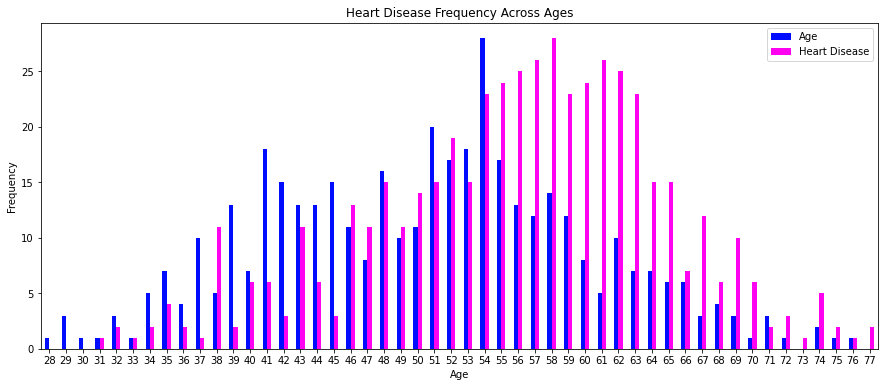

In [375]:
pd.crosstab(heartDataFrame.Age,heartDataFrame.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#000CFF','#FF00F0' ])
plt.title('Heart Disease Frequency Across Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Age", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

In [377]:
heartDataFrame = heartDataFrame.replace('M', 0, regex=True) #Change the male Letter to 0
heartDataFrame = heartDataFrame.replace('F', 1, regex=True) #Change the female letter to 1
heartDataFrame = heartDataFrame.replace('ATA', 0, regex=True) #Change the Chest Pain Type ATA to 0
heartDataFrame = heartDataFrame.replace('NAP', 1, regex=True) #Change the Chest Pain Type NAP to 0
heartDataFrame = heartDataFrame.replace('ASY', 2, regex=True) #Change the Chest Pain Type ASY to 2
heartDataFrame = heartDataFrame.replace('TA', 3, regex=True) #Change The Chest Pain Type TA to 3
heartDataFrame = heartDataFrame.replace('Normal', 0, regex=True) #Change the ECG Rating 'Normal' To 0
heartDataFrame = heartDataFrame.replace('ST', 1, regex=True) #Change the ECG Reading 'ST' to 1
heartDataFrame = heartDataFrame.replace('LVH', 2, regex=True) #Change the ECG Reading 'LVH' To 2
heartDataFrame = heartDataFrame.drop(columns=['ST_Slope', 'ExerciseAngina'], axis = 1) #Drop the two columns that are not useful to us

In [378]:
df = heartDataFrame #Just create a copy
data = df.drop(['HeartDisease'], axis = 1) #Drop The HeartDisease Result class for the copy 
x = (data - np.min(data)) / (np.max(data) - np.min(data)).values #Normalize The Values 
y = heartDataFrame.HeartDisease.values #Y Has The results 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)  #Split array into testing data and training data


C:\Users\aliha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\aliha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [379]:
#Transform the data 
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak
0,40,0,0,140,289,0,0,172,0.0
1,49,1,1,160,180,0,0,156,1.0
2,37,0,0,130,283,0,1,98,0.0
3,48,1,2,138,214,0,0,108,1.5
4,54,0,1,150,195,0,0,122,0.0
...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,1.2
914,68,0,2,144,193,1,0,141,3.4
915,57,0,2,130,131,0,0,115,1.2
916,57,1,0,130,236,0,2,174,0.0


In [380]:
logRegression = LogisticRegression() #Logistic Regression Model 
logRegression.fit(x_train.T,y_train.T) #Fit The Model 
score = logRegression.score(x_test.T,y_test.T)*100 #Score
print("Logisitic Regression Accuracy {:.2f}%".format(acc)) #Print Result
y_pred = logRegression.predict(x_test.T) #PRedictor Variable 
print(classification_report(y_test, y_pred)) #Print Report 

Logisitic Regression Accuracy 78.26%
              precision    recall  f1-score   support

           0       0.78      0.68      0.72        77
           1       0.79      0.86      0.82       107

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



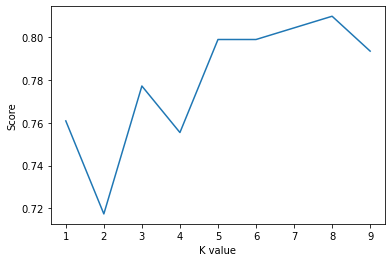

K-Nearest Neighbour Score: 80.98%
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        77
           1       0.84      0.83      0.84       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.81      0.81       184



In [381]:
#See which K-Number scores the highest accuracy 
scores = [] #Score List
for i in range(1, 10): #Loop 10 times 
    knn = KNeighborsClassifier(n_neighbors=i)  #Run i neighbours  
    knn.fit(x_train.T, y_train.T) #Fit the model
    scores.append(knn.score(x_test.T, y_test.T)) #Add Score To List

#Plot the line chart of scores 
plt.plot(range(1, 10), scores)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
knn = KNeighborsClassifier(n_neighbors = 8)  #8 had the best score 
knn.fit(x_train.T, y_train.T) #Fit The Model
print("K-Nearest Neighbour Score: {:.2f}%".format(knn.score(x_test.T, y_test.T)*100))
y_pred = knn.predict(x_test.T)
print(classification_report(y_test, y_pred))

In [382]:
dTree = DecisionTreeClassifier() #Initialize Model 
dTree.fit(x_train.T, y_train.T) #Fit The Model 
score = dTree.score(x_test.T, y_test.T)*100 #Score
print("Decision Tree Test Accuracy {:.2f}%".format(acc)) #Print The Score
y_pred = dTree.predict(x_test.T) #Prediction 
print(classification_report(y_test, y_pred))

Decision Tree Test Accuracy 78.26%
              precision    recall  f1-score   support

           0       0.63      0.70      0.66        77
           1       0.77      0.70      0.73       107

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184

